In [15]:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of data set (number of rows, entities, etc.)

In [2]:
train_df = pd.read_parquet("../data/processed/train.parquet")

print(f"Training data shape: {train_df.shape}")

Training data shape: (6379, 75)


In [22]:
train_df.columns

Index(['Banner Id', 'Round', 'Application Entry Term', 'College',
       'Current First Choice Major', 'Special', 'Current First Choice Degree',
       'Time Status', 'Citizenship', 'Sex', 'Graduate Incentives',
       'Award Amount Per Life', 'School 1 GPA Recalculated',
       'How did you hear about us', 'First Source Summary', 'Age',
       'Essay_Length', 'Matriculated', 'Interaction_Count', 'Events_Attend',
       'Events_NoShow', 'Events_Registered', 'nlp_avg_word_length',
       'nlp_lexical_diversity', 'nlp_avg_sentence_length', 'bert_feature_0',
       'bert_feature_1', 'bert_feature_2', 'bert_feature_3', 'bert_feature_4',
       'bert_feature_5', 'bert_feature_6', 'bert_feature_7', 'bert_feature_8',
       'bert_feature_9', 'bert_feature_10', 'bert_feature_11',
       'bert_feature_12', 'bert_feature_13', 'bert_feature_14',
       'bert_feature_15', 'bert_feature_16', 'bert_feature_17',
       'bert_feature_18', 'bert_feature_19', 'bert_feature_20',
       'bert_feature_21',

# mean, median, standard deviation, IQR) and graphically (histograms, EDCF plots, bar charts, etc

In [25]:
train_df.describe()

,Current First Choice Major,Award Amount Per Life,School 1 GPA Recalculated,Age,Essay_Length,Matriculated,Interaction_Count,Events_Attend,Events_NoShow,Events_Registered,...,bert_feature_40,bert_feature_41,bert_feature_42,bert_feature_43,bert_feature_44,bert_feature_45,bert_feature_46,bert_feature_47,bert_feature_48,bert_feature_49
count,0.0,2144.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,...,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000
mean,NaN,11338.852612,3.420635,27.355698,773.388305,0.171657,2.665308,0.143596,0.126666,0.046716,...,-0.001231,0.000509,-0.004018,-0.002739,-0.004284,-0.001301,-0.001578,-0.001242,-0.002441,0.002975
std,NaN,4555.207753,0.373237,4.593100,317.506734,0.377112,3.632767,0.457759,0.471125,0.246671,...,0.160055,0.156697,0.154933,0.151728,0.148412,0.151935,0.143793,0.144239,0.141921,0.139708
min,NaN,2000.000000,0.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.597878,-0.678814,-0.720966,-0.722436,-0.939952,-0.613766,-0.647595,-0.771653,-0.546626,-0.594188
25%,NaN,7500.000000,3.160000,24.000000,522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.105138,-0.099215,-0.102164,-0.094294,-0.099238,-0.100384,-0.093889,-0.088341,-0.097606,-0.087249
50%,NaN,10000.000000,3.450000,26.000000,734.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-0.001145,-0.002659,-0.005097,-0.004175,-0.002859,-0.006923,-0.002014,0.001731,-0.003913,0.004021
75%,NaN,15500.000000,3.727000,29.000000,985.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.103055,0.098192,0.096403,0.091268,0.091419,0.090844,0.092080,0.083805,0.087843,0.094008
max,NaN,25000.000000,4.800000,59.000000,5178.000000,1.000000,42.000000,5.000000,10.000000,4.000000,...,0.674814,1.077484,0.787603,0.756325,0.725135,1.216323,0.835054,0.762602,0.645701,0.958650


In [23]:
hist_columns = [
    "School 1 GPA Recalculated",
    "Age",
    "Essay_Length",
    "Interaction_Count",
    "Events_Attend",
    "Events_NoShow",
    "Events_Registered"
]


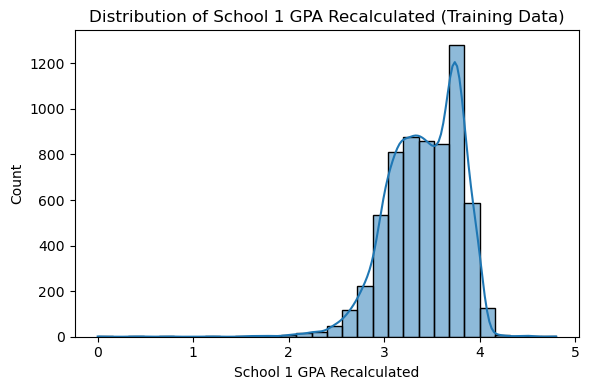

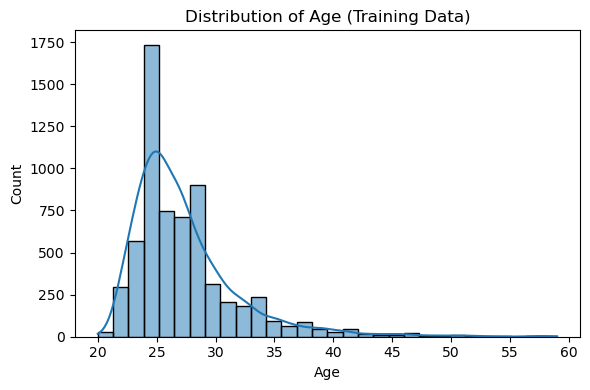

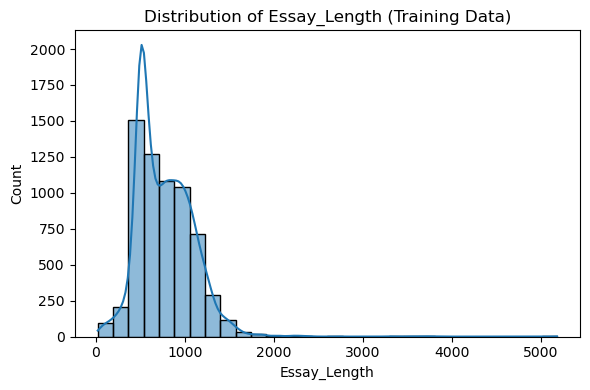

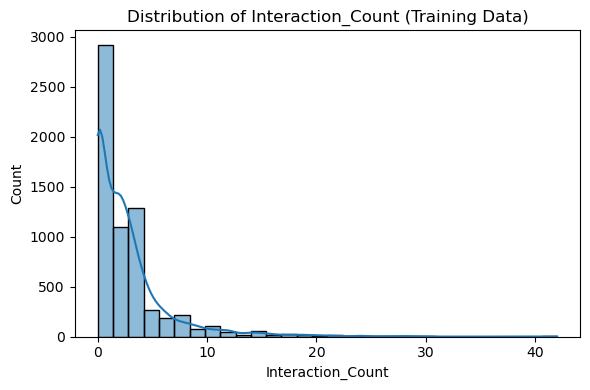

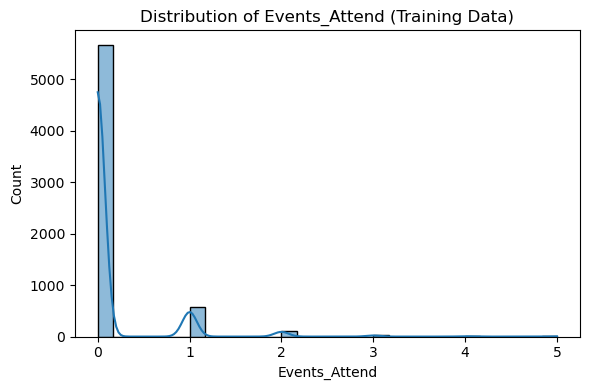

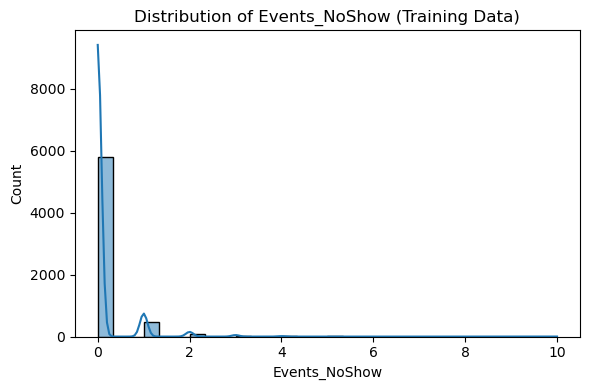

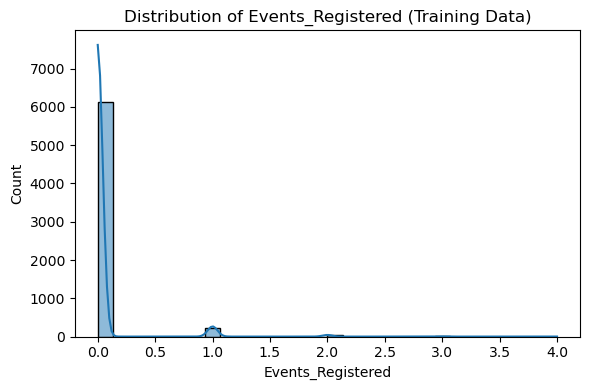

In [24]:
for col in hist_columns:
    if col in train_df.columns:
        plt.figure(figsize=(6, 4))
        
        sns.histplot(
            train_df[col].dropna(),
            bins=30,
            kde=True
        )
        
        plt.title(f"Distribution of {col} (Training Data)")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column not found: {col}")


# Bar chart

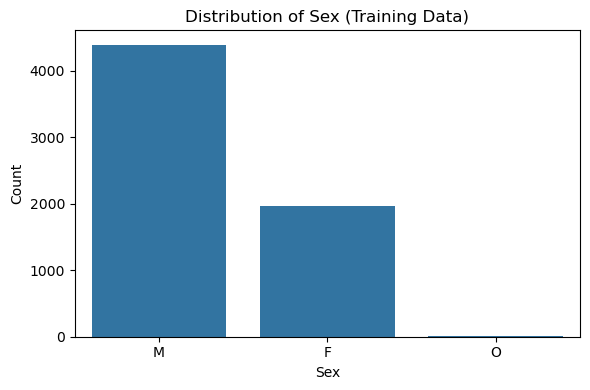

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=train_df,
    x="Sex",
    order=train_df["Sex"].value_counts().index
)
plt.title("Distribution of Sex (Training Data)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


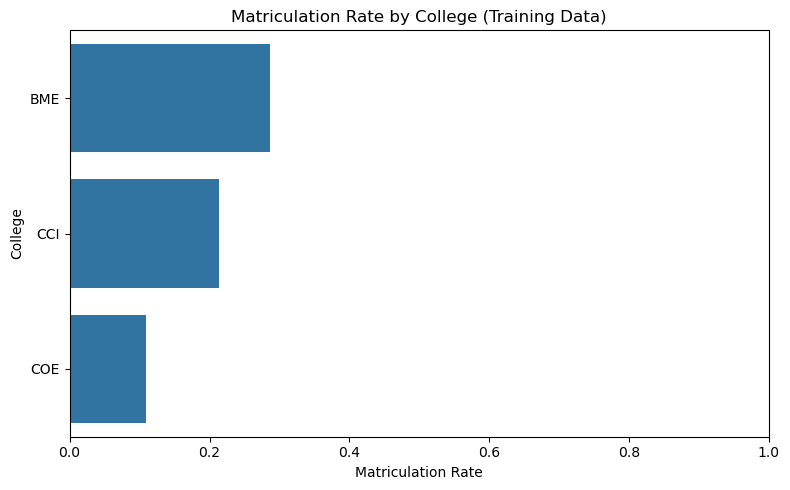

In [28]:
col = "College"

matric_by_college = (
    train_df
    .groupby(col)["Matriculated"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=matric_by_college.values,
    y=matric_by_college.index
)
plt.xlabel("Matriculation Rate")
plt.ylabel(col)
plt.title(f"Matriculation Rate by {col} (Training Data)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# ECDF plot

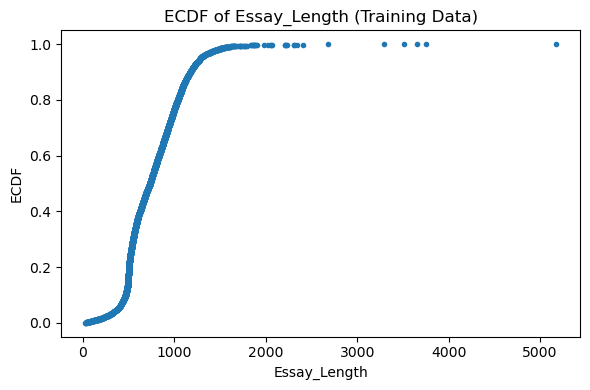

In [26]:
# Select data
x = np.sort(train_df["Essay_Length"].dropna())
y = np.arange(1, len(x) + 1) / len(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Essay_Length")
plt.ylabel("ECDF")
plt.title("ECDF of Essay_Length (Training Data)")
plt.tight_layout()
plt.show()


# Corelation

In [3]:
TARGET = "Matriculated"

y = train_df[TARGET]
X = train_df.drop(columns=[TARGET])

In [4]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 62
Categorical columns: 12


In [5]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

print(f"Encoded feature count: {X_encoded.shape[1]}")


Encoded feature count: 6551


In [6]:
corr_df = pd.concat([y, X_encoded], axis=1)

In [7]:
correlations = corr_df.corr()[TARGET].drop(TARGET)

corr_table = correlations.reset_index()
corr_table.columns = ["Feature", "Correlation_with_Matriculated"]

corr_table = corr_table.sort_values(
    "Correlation_with_Matriculated",
    ascending=False
)

corr_table.head(10)


,Feature,Correlation_with_Matriculated
6479,Citizenship_US,0.319977
6478,Time Status_Part-time,0.313804
6489,How did you hear about us_Work,0.184464
6484,How did you hear about us_Alumni/local,0.153599
3,Age,0.152028
13,bert_feature_1,0.150809
6476,Current First Choice Degree_MS in Software Eng...,0.142890
5,Interaction_Count,0.132701
6487,How did you hear about us_Person,0.113075
6448,College_CCI,0.111307


In [10]:
corr_table["Abs_Correlation"] = corr_table["Correlation_with_Matriculated"].abs()

strong_corr = corr_table.sort_values("Abs_Correlation", ascending=False)

strong_corr.head(20)

,Feature,Correlation_with_Matriculated,Abs_Correlation
6479,Citizenship_US,0.319977,0.319977
6478,Time Status_Part-time,0.313804,0.313804
6489,How did you hear about us_Work,0.184464,0.184464
12,bert_feature_0,-0.172638,0.172638
4,Essay_Length,-0.158724,0.158724
6484,How did you hear about us_Alumni/local,0.153599,0.153599
3,Age,0.152028,0.152028
13,bert_feature_1,0.150809,0.150809
6449,College_COE,-0.147398,0.147398
6476,Current First Choice Degree_MS in Software Eng...,0.142890,0.142890


In [11]:
print("Top positive correlations:")
display(strong_corr[strong_corr["Correlation_with_Matriculated"] > 0].head(10))

print("Top negative correlations:")
display(strong_corr[strong_corr["Correlation_with_Matriculated"] < 0].head(10))

Top positive correlations:


,Feature,Correlation_with_Matriculated,Abs_Correlation
6479,Citizenship_US,0.319977,0.319977
6478,Time Status_Part-time,0.313804,0.313804
6489,How did you hear about us_Work,0.184464,0.184464
6484,How did you hear about us_Alumni/local,0.153599,0.153599
3,Age,0.152028,0.152028
13,bert_feature_1,0.150809,0.150809
6476,Current First Choice Degree_MS in Software Eng...,0.142890,0.142890
5,Interaction_Count,0.132701,0.132701
6487,How did you hear about us_Person,0.113075,0.113075
6448,College_CCI,0.111307,0.111307


Top negative correlations:


,Feature,Correlation_with_Matriculated,Abs_Correlation
12,bert_feature_0,-0.172638,0.172638
4,Essay_Length,-0.158724,0.158724
6449,College_COE,-0.147398,0.147398
6527,First Source Summary_Primary Source,-0.125414,0.125414
6482,Graduate Incentives_Grad Deans Fellow,-0.109122,0.109122
22,bert_feature_10,-0.099374,0.099374
18,bert_feature_6,-0.091824,0.091824
6456,Current First Choice Degree_MS in Civil Engine...,-0.074633,0.074633
6457,Current First Choice Degree_MS in Computer Eng...,-0.070989,0.070989
6444,Round_2024-25 Graduate (On Campus),-0.057604,0.057604


In [17]:
# Prepare data for heatmap
heatmap_data = strong_corr.set_index("Feature")[["Correlation_with_Matriculated"]]

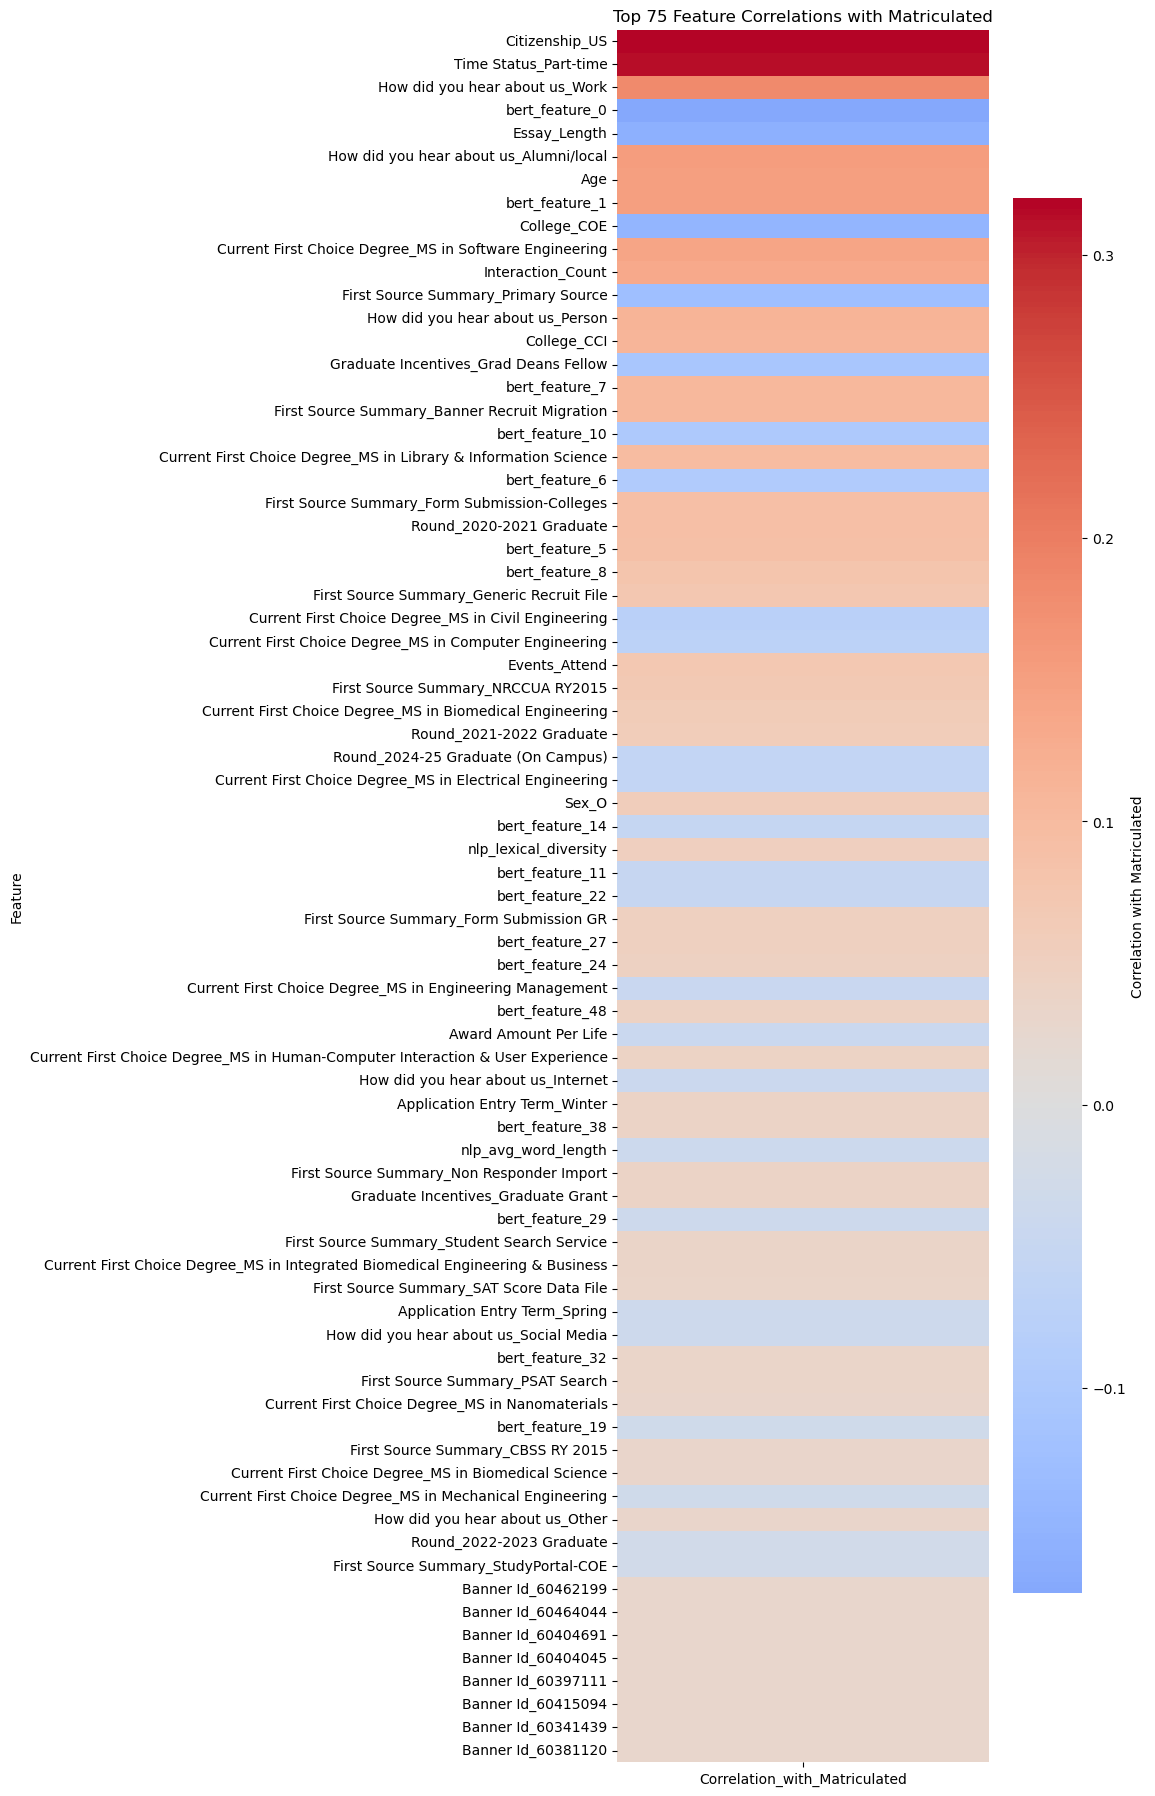

In [20]:
TOP_N = 75
heatmap_data_top = strong_corr.head(TOP_N).set_index("Feature")[["Correlation_with_Matriculated"]]

plt.figure(figsize=(6, 0.3 * TOP_N))
sns.heatmap(
    heatmap_data_top,
    cmap="coolwarm",
    center=0,
    cbar_kws={"label": "Correlation with Matriculated"}
)
plt.title(f"Top {TOP_N} Feature Correlations with Matriculated")
plt.tight_layout()
plt.show()
